In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import plotly.express as px
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:

boston=load_boston()
features=boston.feature_names
bos=pd.DataFrame(boston.data,columns=features)

In [4]:
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Dataset Description:
ref: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

    Variables
    There are 14 attributes in each case of the dataset. They are:

        CRIM - per capita crime rate by town
        ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
        INDUS - proportion of non-retail business acres per town.
        CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
        NOX - nitric oxides concentration (parts per 10 million)
        RM - average number of rooms per dwelling
        AGE - proportion of owner-occupied units built prior to 1940
        DIS - weighted distances to five Boston employment centres
        RAD - index of accessibility to radial highways
        TAX - full-value property-tax rate per  USD10,000  
        PTRATIO - pupil-teacher ratio by town
        B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        LSTAT - % lower status of the population
        MEDV - Median value of owner-occupied homes in USD1000's

In [5]:
bos.shape

(506, 13)

In [6]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

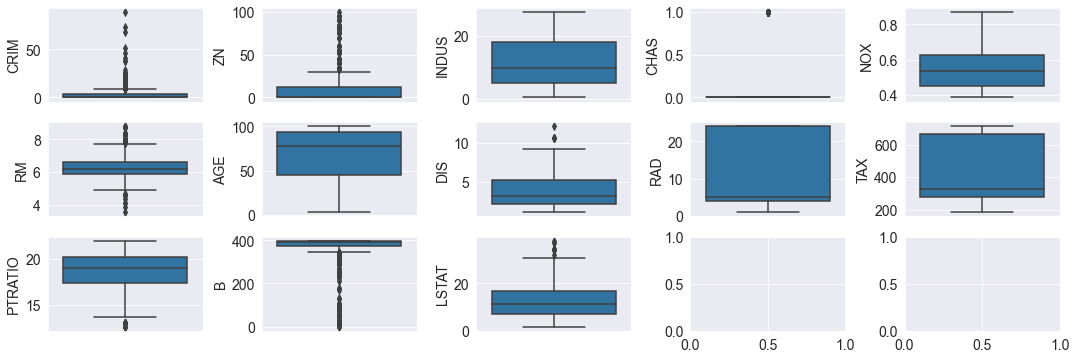

In [7]:
fig,ax=plt.subplots(ncols=5,nrows=3,figsize=(15,5))
ax=ax.flatten()
index=0
for i in bos.columns:
    sns.boxplot(y=i,data=bos,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5)
plt.show()

ZN and CHAS can be removed as most of the values are zeros and ar hightly skewed.

In [8]:
bos.drop(['ZN','CHAS'],axis=1,inplace=True)

In [9]:
for i in bos.columns:
    bos.sort_values(by=i,ascending=True)
    q1,q3=np.percentile(bos[i],[25,75])
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    outliers=bos[i][(bos[i]<lb)|(bos[i]>ub)]
    per_outliers=(outliers.count()/bos[i].count())*100
    print("Percentage of outliers in {} is {}".format(i,per_outliers))
    cols=['CRIM',  'RM',  'DIS',  'PTRATIO','B', 'LSTAT', 'PRICE']

Percentage of outliers in CRIM is 13.043478260869565
Percentage of outliers in INDUS is 0.0
Percentage of outliers in NOX is 0.0
Percentage of outliers in RM is 5.928853754940711
Percentage of outliers in AGE is 0.0
Percentage of outliers in DIS is 0.9881422924901186
Percentage of outliers in RAD is 0.0
Percentage of outliers in TAX is 0.0
Percentage of outliers in PTRATIO is 2.9644268774703555
Percentage of outliers in B is 15.217391304347828
Percentage of outliers in LSTAT is 1.383399209486166


In [22]:
#calculate interquartile range 
q3, q1 = np.percentile(bos['CRIM'], [75 ,25])
iqr = q3 - q1

In [23]:
upper_limit = bos['CRIM'].quantile(0.75) + 1.5 * iqr
lower_limit =  bos['CRIM'].quantile(0.25) - 1.5 * iqr

In [24]:
bos['CRIM'] = np.where(bos['CRIM'] >= upper_limit,
        upper_limit,
        np.where(bos['CRIM'] <= lower_limit,
        lower_limit,
        bos['CRIM']))

<AxesSubplot:ylabel='CRIM'>

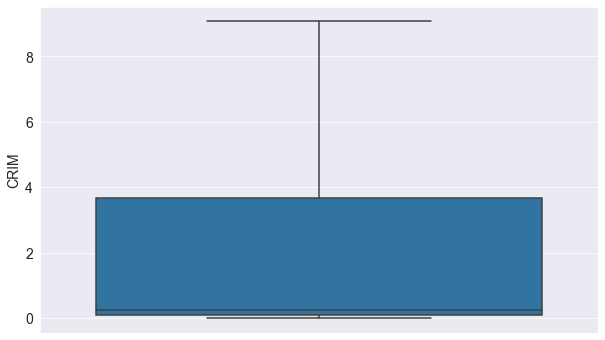

In [25]:
 sns.boxplot(y=bos.CRIM,data=bos)

<AxesSubplot:ylabel='DIS'>

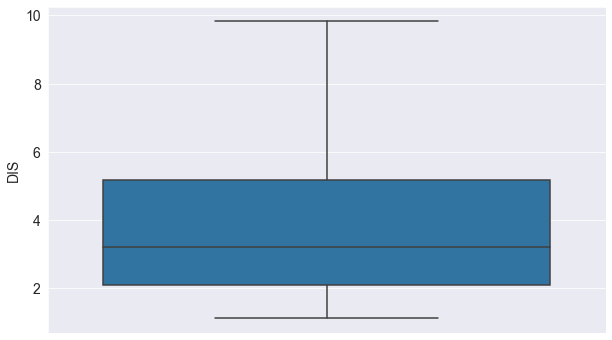

In [29]:
#calculate interquartile range 
q3, q1 = np.percentile(bos['DIS'], [75 ,25])
iqr = q3 - q1
upper_limit = bos['DIS'].quantile(0.75) + 1.5 * iqr
lower_limit =  bos['DIS'].quantile(0.25) - 1.5 * iqr
bos['DIS'] = np.where( bos['DIS'] >= upper_limit,
        upper_limit,
        np.where( bos['DIS']<= lower_limit,
        lower_limit,
         bos['DIS']))
sns.boxplot(y= bos['DIS'],data=bos)

<AxesSubplot:ylabel='RM'>

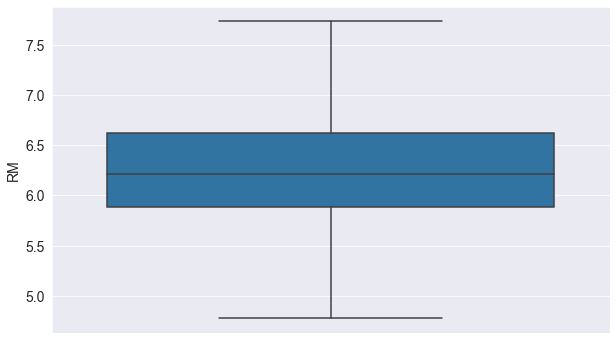

In [30]:
#calculate interquartile range 
q3, q1 = np.percentile(bos['RM'], [75 ,25])
iqr = q3 - q1
upper_limit = bos['RM'].quantile(0.75) + 1.5 * iqr
lower_limit =  bos['RM'].quantile(0.25) - 1.5 * iqr
bos['RM'] = np.where(bos['RM'] >= upper_limit,
        upper_limit,
        np.where(bos['RM'] <= lower_limit,
        lower_limit,
        bos['RM']))
sns.boxplot(y=bos.RM,data=bos)

<AxesSubplot:ylabel='PTRATIO'>

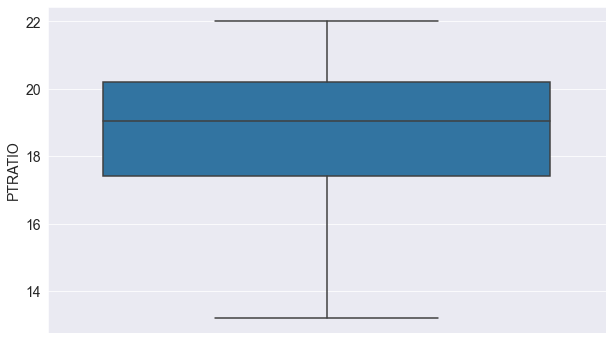

In [31]:
#calculate interquartile range 
q3, q1 = np.percentile(bos['PTRATIO'], [75 ,25])
iqr = q3 - q1
upper_limit = bos['PTRATIO'].quantile(0.75) + 1.5 * iqr
lower_limit =  bos['PTRATIO'].quantile(0.25) - 1.5 * iqr
bos['PTRATIO'] = np.where(bos['PTRATIO'] >= upper_limit,
        upper_limit,
        np.where(bos['PTRATIO'] <= lower_limit,
        lower_limit,
        bos['PTRATIO']))
sns.boxplot(y=bos['PTRATIO'],data=bos)

<AxesSubplot:ylabel='B'>

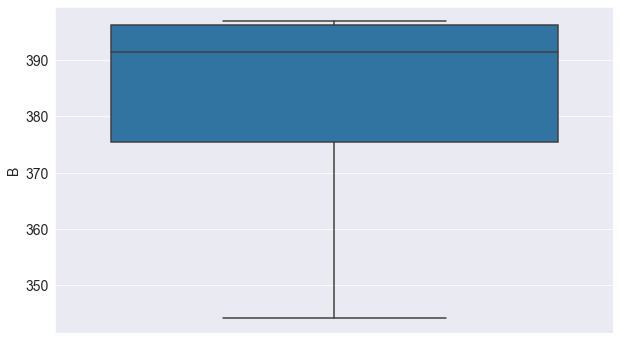

In [32]:
#calculate interquartile range 
q3, q1 = np.percentile(bos['B'], [75 ,25])
iqr = q3 - q1
upper_limit = bos['B'].quantile(0.75) + 1.5 * iqr
lower_limit =  bos['B'].quantile(0.25) - 1.5 * iqr
bos['B'] = np.where(bos['B'] >= upper_limit,
        upper_limit,
        np.where(bos['B'] <= lower_limit,
        lower_limit,
       bos['B']))
sns.boxplot(y=bos['B'],data=bos)

<AxesSubplot:ylabel='LSTAT'>

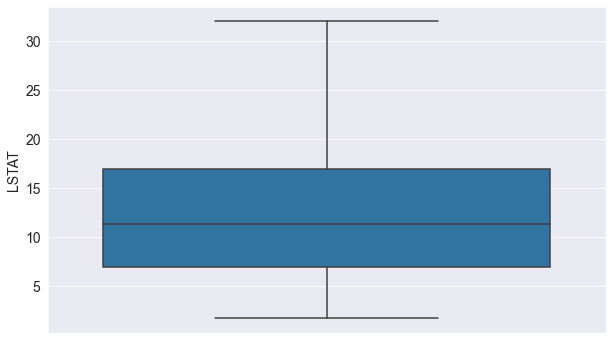

In [33]:
#calculate interquartile range 
q3, q1 = np.percentile(bos['LSTAT'], [75 ,25])
iqr = q3 - q1
upper_limit =bos['LSTAT'].quantile(0.75) + 1.5 * iqr
lower_limit =  bos['LSTAT'].quantile(0.25) - 1.5 * iqr
bos['LSTAT'] = np.where(bos['LSTAT'] >= upper_limit,
        upper_limit,
        np.where(bos['LSTAT'] <= lower_limit,
        lower_limit,
      bos['LSTAT']))
sns.boxplot(y=bos['LSTAT'],data=bos)

In [35]:
target=boston.target
bos['MEDV']=target

<AxesSubplot:ylabel='MEDV'>

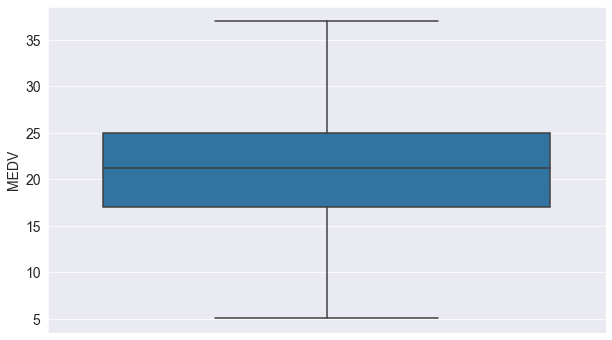

In [36]:
#calculate interquartile range 
q3, q1 = np.percentile(bos['MEDV'], [75 ,25])
iqr = q3 - q1
upper_limit =bos['MEDV'].quantile(0.75) + 1.5 * iqr
lower_limit =  bos['MEDV'].quantile(0.25) - 1.5 * iqr
bos['MEDV'] = np.where(bos['MEDV'] >= upper_limit,
        upper_limit,
        np.where(bos['MEDV'] <= lower_limit,
        lower_limit,
      bos['MEDV']))
sns.boxplot(y=bos['MEDV'],data=bos)

In [37]:
X=bos.drop('MEDV',axis=1)

In [38]:
y=bos['MEDV']

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [40]:
from sklearn.ensemble import RandomForestRegressor
# Create the model
rf_reg = RandomForestRegressor(n_jobs=1,random_state=42)
# Fit the model
rf_reg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=1, random_state=42)

In [43]:
from sklearn.metrics import mean_squared_error

rf_reg_train_preds = rf_reg.predict(X_train)
rf_reg_train_rmse = mean_squared_error(rf_reg_train_preds,y_train)
rf_reg_test_preds = rf_reg.predict(X_test)
rf_reg_test_rmse = mean_squared_error(rf_reg_test_preds,y_test)
print('Train RMSE: {}, TEST RMSE: {}'.format(rf_reg_train_rmse, rf_reg_test_rmse))




Train RMSE: 1.2650982419668046, TEST RMSE: 7.702792299136514


In [73]:
from sklearn.model_selection import RandomizedSearchCV
# Create the model with custom hyperparameters
rf2 = RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [75]:
rf_random.best_params_


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [76]:
rf_random = RandomForestRegressor(n_estimators= 400,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= None,
 bootstrap= False)

In [77]:
rf_random.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=400)

In [78]:

rf2_train_preds = rf_random.predict(X_train)
rf2_train_rmse = mean_squared_error(rf2_train_preds,y_train)
rf2_test_preds = rf_random.predict(X_test)
rf2_test_rmse = mean_squared_error(rf2_test_preds,y_test)
print('Train RMSE: {}, TEST RMSE: {}'.format(rf2_train_rmse, rf2_test_rmse))

Train RMSE: 1.0240112994287248e-07, TEST RMSE: 5.89447467054509


In [81]:
bos.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [84]:
columns=bos.drop('MEDV',axis=1)

In [86]:

rf2_importance_df = pd.DataFrame({
    'feature': columns,
    'importance': rf_random.feature_importances_
}).sort_values('importance', ascending=False)

In [87]:
rf2_importance_df


,feature,importance
10,LSTAT,0.299927
3,RM,0.258705
8,PTRATIO,0.076579
2,NOX,0.073521
1,INDUS,0.068310
0,CRIM,0.062631
5,DIS,0.058034
7,TAX,0.043105
4,AGE,0.025202
9,B,0.019555


In [103]:
columns

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [97]:
import pickle
filename_model='boston_RF_model.pickle'
pickle.dump(rf_random, open(filename_model,'wb'))
filename_scaler = 'scaler.pkl'
pickle.dump(scaler, open(filename_scaler, 'wb'))
# prediction using the saved model.
loaded_model = pickle.load(open(filename_model, 'rb'))
load_scaler=pickle.load(open(filename_scaler,'rb'))

In [98]:
scaled_test=load_scaler.transform([[0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]])

In [99]:

predict_loaded=loaded_model.predict(load_scaler.transform([[0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]]))
print(predict_loaded[0])

27.517875
